#Создадим мини-проект для понимания требуемых навыков Python junior

Подключим необходимые библиотеки

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Укажем адрес нашей страницы с поиском, я использовал отбор "Python junior"
url = 'https://hh.ru/search/vacancy?area=113&search_field=name&enable_snippets=false&text=Python+junior&from=suggest_post&ored_clusters=true'

# Внесем инфо со страницы ( вкладка network)
headers = {
    "accept": "*/*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.5615.50 Safari/537.36"
}
req = requests.get(url, headers=headers)
src = req.text

# Создаем объект супа
soup = BeautifulSoup(src, 'lxml')

# Ищем класс для ссылок
all_vacancy_hrefs = soup.find_all(class_="serp-item__title")

# Создаем csv файл и записываем заголовки
with open('/content/drive/MyDrive/parce/hh/vacancies.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['item_text', 'item_href', 'vacancy_id', 'skills', 'price', 'experience'])

    # Обходим ссылки
    skills_counter = {}
    for item in all_vacancy_hrefs:
        item_text = item.text
        item_href = item.get('href')
        vacancy_id = item_href.split('/')[-1].split('?')[0]
        print(item_text)
        print(item_href)
        print(vacancy_id)

        # Получаем информацию по вакансии
        vacancy_req = requests.get(item_href, headers=headers)
        vacancy_src = vacancy_req.text
        vacancy_soup = BeautifulSoup(vacancy_src, 'lxml')

        # Ищем элемент с классом "bloko-tag-list"
        skills_elem = vacancy_soup.find(class_="bloko-tag-list")
        # Проверяем, был ли найден элемент
        if skills_elem is not None:
            # Получаем список всех дочерних элементов
            skills_children = skills_elem.findChildren()

            # Извлекаем текст каждого дочернего элемента и сохраняем его в список
            skills = []
            for child in skills_children:
                skill_text = child.text.strip()
                if skill_text not in skills:
                    skills.append(skill_text)

                    # Считаем уникальные значения навыков
                    if skill_text in skills_counter:
                        skills_counter[skill_text] += 1
                    else:
                        skills_counter[skill_text] = 1

            # Выводим список всех дочерних текстов
            print(skills)
        else:
            skills = []
            print("Элемент с классом 'bloko-tag-list' не найден на странице.")

        price = vacancy_soup.find(class_="bloko-header-section-2 bloko-header-section-2_lite").text
        print(price)
        experience = vacancy_soup.find("span",{"data-qa":"vacancy-experience"}).text
        print(experience)

        # Записываем полученные данные в csv файл
        writer.writerow([item_text, item_href, vacancy_id, skills, price, experience])


Intern / Junior Python backend developer
https://hh.ru/vacancy/79681180?from=vacancy_search_list&query=Python+junior
79681180
['Python', 'Celery', 'Docker', 'JavaScript', 'RabbitMQ', 'Elasticsearch', 'Redis', 'PostgreSQL', 'MongoDB', 'Django', 'Nginx', 'Kubernetes']
до 60 000 руб. до вычета налогов
не требуется
Программист Python (Junior)
https://hh.ru/vacancy/79675546?from=vacancy_search_list&query=Python+junior
79675546
['Python', 'Git', 'Django Framework', 'SQL']
до 40 000 руб. до вычета налогов
не требуется
Python-разработчик (Junior)
https://hh.ru/vacancy/79663730?from=vacancy_search_list&query=Python+junior
79663730
['Python', 'Git', 'PostgreSQL', 'Английский\xa0— B2 — Средне-продвинутый']
от 50 000 до 70 000 руб. на руки
1–3 года
Junior Python developer
https://hh.ru/vacancy/79885796?from=vacancy_search_list&query=Python+junior
79885796
['Python', 'Git', 'Linux']
от 50 000 до 90 000 руб. на руки
не требуется
Junior Программист/Разработчик Python
https://hh.ru/vacancy/78968578?fr

Для объединения повторяющихся строк нужно сначала создать новый словарь, в котором ключи - это названия скиллов, а значения - это счетчики. Затем пройтись по словарю skills_counter и для каждого ключа и проверить, содержится ли он в уже созданном словаре. Если ключ уже есть, добавляем к счетчику в этом словаре значение из skills_counter, иначе добавляем новую запись в словарь с текущим значением.

In [ ]:
merged_skills_counter = {}
for skill, count in skills_counter.items():
    found = False
    for merged_skill in merged_skills_counter.keys():
        if skill in merged_skill or merged_skill in skill:
            merged_skills_counter[merged_skill] += count
            found = True
            break
    if not found:
        merged_skills_counter[skill] = count

print(f"Запрос Python junior вакансий: {len(all_vacancy_hrefs)}")
for skill, count in sorted(merged_skills_counter.items(), key=lambda item: item[1], reverse=True):
    print(f"{skill}: {count}")

Запрос Python junior вакансий: 20
Python: 16
Git: 11
Django: 10
PostgreSQL: 9
Linux: 6
CSS: 3
Celery: 2
Docker: 2
Elasticsearch: 2
Nginx: 2
C#: 2
PyQt: 2
Ответственность: 2
JavaScript: 1
RabbitMQ: 1
Redis: 1
MongoDB: 1
Kubernetes: 1
Английский — B2 — Средне-продвинутый: 1
C++: 1
PySide: 1
Рефакторинг кода: 1
СУБД: 1
JS: 1
Ubuntu: 1
Обучаемый: 1
Желание учиться и развиваться: 1
Умение адаптироваться: 1
Flask: 1
NoSQL: 1
Mercurial: 1
ООП: 1
REST: 1
Angular: 1
Английский язык: 1
Функциональное тестирование: 1
Тестирование: 1
ASP.NET: 1
SQL Server: 1
TypeScript: 1
Pytest: 1
QA: 1
MySQL: 1
Trello: 1
Backend: 1
Работа в команде: 1


Запрос Python junior вакансий: 20
Python: 16
Git: 11
Django: 10
PostgreSQL: 9
Linux: 6
CSS: 3
Celery: 2
Docker: 2
Elasticsearch: 2
Nginx: 2


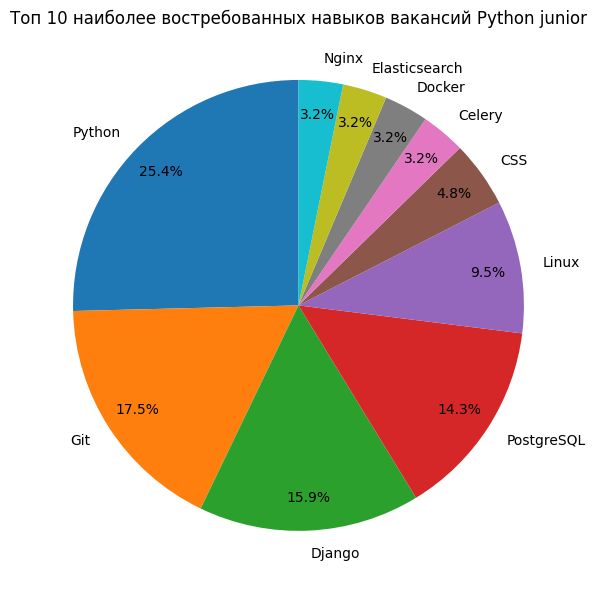

In [ ]:
# Выводим только топ N навыков
top_n = 10
merged_skills_counter = dict(sorted(merged_skills_counter.items(), key=lambda item: item[1], reverse=True)[:top_n])

print(f"Запрос Python junior вакансий: {len(all_vacancy_hrefs)}")
for skill, count in merged_skills_counter.items():
    print(f"{skill}: {count}")

# Построение диаграммы
labels = merged_skills_counter.keys()
sizes = merged_skills_counter.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax1.axis('equal')

plt.title("Топ {} наиболее востребованных навыков вакансий Python junior".format(top_n))
plt.subplots_adjust(top=1.25)
plt.show()